Part 1: Data acquisition

In [1]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
hackerNewsURL = 'https://news.ycombinator.com/'
with urllib.request.urlopen(hackerNewsURL) as response:
    html = response.read()
    html = html.decode('utf-8')

In [4]:
with open('hackerNewsFile.html', 'w') as hackerNewsFile:
    hackerNewsFile.write(html)

In [5]:
hackerNewsSoup = BeautifulSoup(open("hackerNewsFile.html"), "html.parser")
print(hackerNewsSoup.prettify())

<html lang="en" op="news">
 <head>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="news.css?IHzW3yUv016xX21sL2a6" rel="stylesheet" type="text/css"/>
  <link href="favicon.ico" rel="shortcut icon"/>
  <link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <title>
   Hacker News
  </title>
 </head>
 <body>
  <center>
   <table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
    <tr>
     <td bgcolor="#ff6600">
      <table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%">
       <tr>
        <td style="width:18px;padding-right:4px">
         <a href="https://news.ycombinator.com">
          <img height="18" src="y18.gif" style="border:1px white solid;" width="18"/>
         </a>
        </td>
        <td style="line-height:12pt; height:10px;">
         <span class="pagetop">
          <b class="hnname">
           <a href

In [6]:
def toHours(splitSubtext):
    age = int(splitSubtext[-3])

    if (splitSubtext[-2] == 'hours' or splitSubtext[-2] == 'hour'):
        return age
    
    elif (splitSubtext[-2] == 'minutes'):
        return (age/60)
    
    elif (splitSubtext[-2] == 'day' or splitSubtext[5] == 'days'):
        return (age*24)

In [7]:
def getRank(header):
    print(header)
    splitHeader = header.split(' ')
    rank = splitHeader[0].replace('.', '')
    return int(rank)

In [8]:
def getTitleLength(header):
    strippedHeader = header[3:] #takes away the rank part of the header
    count = 0
    for char in strippedHeader:
        if (char == '('):
            return (count-1) #Subtract the extra whitespace between the title and the parenths with username 
        else:
            count = count + 1

In [9]:
def getAge(subtext):
    splitSubtext = subtext.split('|')
    mostSubtext = splitSubtext[0].split(' ')
    
    #trims subtext so that the keyword 'ago' is the last item in the subtext
    agoIndex = mostSubtext.index('ago') + 1
    mostSubtext = mostSubtext[:agoIndex]
    print(mostSubtext)
    return toHours(mostSubtext)

In [10]:
def getPoints(subtext):
    splitSubtext = subtext.split(' ')
    if (splitSubtext[1] == 'points' or splitSubtext[1] == 'point'):
        return int(splitSubtext[0])
    
    return 0

In [11]:
def getComments(subtext):
    splitSubtext = subtext.split('|')
    comments = splitSubtext[-1]
    if ('comment' not in comments):
        return 0
    
    comments = comments.replace('comment', '')
    
    try:
        comments = comments.replace('s', '')
    except ValueError:
        pass
    return int(comments)

In [12]:
headers = hackerNewsSoup.find_all(class_='athing')

In [13]:
headerList = []
for header in headers:
    headerList.append(header.text.strip())


In [14]:
subtexts = hackerNewsSoup.find_all(class_='subtext')

In [15]:
subtextList = []
for subtext in subtexts:
    subtextList.append(subtext.text.strip())


In [16]:
for subtext in subtextList:

    print(subtext)
    print(getAge(subtext))

107 points by squarecog 2 hours ago  | hide | 28 comments
['107', 'points', 'by', 'squarecog', '2', 'hours', 'ago']
2
280 points by signa11 7 hours ago  | hide | 93 comments
['280', 'points', 'by', 'signa11', '7', 'hours', 'ago']
7
67 points by ethanpil 3 hours ago  | hide | 42 comments
['67', 'points', 'by', 'ethanpil', '3', 'hours', 'ago']
3
185 points by altrus 4 hours ago  | hide | 114 comments
['185', 'points', 'by', 'altrus', '4', 'hours', 'ago']
4
594 points by rdgthree 8 hours ago  | hide | 453 comments
['594', 'points', 'by', 'rdgthree', '8', 'hours', 'ago']
8
100 points by Osiris30 5 hours ago  | hide | 62 comments
['100', 'points', 'by', 'Osiris30', '5', 'hours', 'ago']
5
57 points by yewenjie 4 hours ago  | hide | 28 comments
['57', 'points', 'by', 'yewenjie', '4', 'hours', 'ago']
4
66 points by todsacerdoti 4 hours ago  | hide | 35 comments
['66', 'points', 'by', 'todsacerdoti', '4', 'hours', 'ago']
4
134 points by lnyan 8 hours ago  | hide | 25 comments
['134', 'points', 

In [17]:
rankList = []
titleLengthList = []
hoursPostedList = []
pointsList = []
commentList = []
frontPage = []
for i in range(30):
    rankList.append(getRank(headerList[i]))
    titleLengthList.append(getTitleLength(headerList[i]))
    hoursPostedList.append(getAge(subtextList[i]))
    pointsList.append(getPoints(subtextList[i]))
    commentList.append(getComments(subtextList[i]))
    frontPage.append(1)


1. Building a data team at a mid-stage startup (erikbern.com)
['107', 'points', 'by', 'squarecog', '2', 'hours', 'ago']
2. The Greatest Regex Trick Ever (2014) (rexegg.com)
['280', 'points', 'by', 'signa11', '7', 'hours', 'ago']
3. City of Bloomington's Raspberry Pi Based Employee Timeclocks (city-of-bloomington.github.io)
['67', 'points', 'by', 'ethanpil', '3', 'hours', 'ago']
4. List of Special Elevator Modes (elevation.fandom.com)
['185', 'points', 'by', 'altrus', '4', 'hours', 'ago']
5. We replaced rental brokers with software and filled 200 vacant apartments (caretaker.com)
['594', 'points', 'by', 'rdgthree', '8', 'hours', 'ago']
6. Why geothermal isn't ubiquitous and how it might get that way (eth.link)
['100', 'points', 'by', 'Osiris30', '5', 'hours', 'ago']
7. Tenacity: Floss Audacity Fork (github.com/tenacityteam)
['57', 'points', 'by', 'yewenjie', '4', 'hours', 'ago']
8. How I Made a Giant Mistake with Terraform (and How Azure Made It Worse) (craigstuntz.com)
['66', 'points',

In [18]:
hackerNewsData = pd.DataFrame({'Rank': rankList,
                               'Title_Length': titleLengthList,
                               'Hours_Posted': hoursPostedList,
                               'Points': pointsList,
                               'Comments': commentList,
                               'Front_Page': frontPage})
# hackerNewsData.set_index('Rank', inplace=True)
display(hackerNewsData)

,Rank,Title_Length,Hours_Posted,Points,Comments,Front_Page
0,1,43,2,107,28,1
1,2,29,7,280,93,1
2,3,60,3,67,42,1
3,4,30,4,185,114,1
4,5,73,8,594,453,1
5,6,61,5,100,62,1
6,7,29,4,57,28,1
7,8,41,4,66,35,1
8,9,62,8,134,25,1
9,10,34,5,80,19,1


Now that we have the first page, get the other 4 pages. I know these are excessively big and complicated methods that definately need to be refactored to look beautiful, but hey, they work.

In [19]:
def writeHTML(url):
    with urllib.request.urlopen(newsURL) as response:
        html = response.read()
        html = html.decode('utf-8')
    
    with open('hackerNewsFileNextPage.html', 'w') as hackerNewsFileNextPage:
        hackerNewsFileNextPage.write(html)

In [20]:
def addPageToDataframe(dataframe, headersList, subtextsList):

    rankListAgain = []
    titleLengthListAgain = []
    hoursPostedListAgain = []
    pointsListAgain = []
    commentListAgain = []
    frontPageAgain = []
    for i in range(30):
        rankListAgain.append(getRank(headersList[i]))
        titleLengthListAgain.append(getTitleLength(headersList[i]))
        hoursPostedListAgain.append(getAge(subtextsList[i]))
        pointsListAgain.append(getPoints(subtextsList[i]))
        commentListAgain.append(getComments(subtextsList[i]))
        frontPageAgain.append(0)

    hackerNewsDataAgain = pd.DataFrame({'Rank': rankListAgain,
                               'Title_Length': titleLengthListAgain,
                               'Hours_Posted': hoursPostedListAgain,
                               'Points': pointsListAgain,
                               'Comments': commentListAgain,
                               'Front_Page': frontPageAgain})
    return (dataframe.append(hackerNewsDataAgain))

In [21]:
for i in range(2, 5):
    newsURL = "https://news.ycombinator.com/news?p=" + str(i)
    print(newsURL)

    writeHTML(newsURL)
    
    hackerNewsSoupAgain = BeautifulSoup(open("hackerNewsFileNextPage.html"), "html.parser")
    
    headersAgain = hackerNewsSoupAgain.find_all(class_='athing')
    subtextsAgain = hackerNewsSoupAgain.find_all(class_='subtext')
    
    headerListAgain = []
    for header in headersAgain:
        headerListAgain.append(header.text.strip())

    subtextListAgain = []
    for subtext in subtextsAgain:
        subtextListAgain.append(subtext.text.strip())
        
    hackerNewsData = addPageToDataframe(hackerNewsData, headerListAgain, subtextListAgain)
    
display(hackerNewsData)

https://news.ycombinator.com/news?p=2
31. Wild birds learn to avoid distasteful prey by watching others (helsinki.fi)
['54', 'points', 'by', 'hhs', '10', 'hours', 'ago']
32. Mark Zuckerberg and Sheryl Sandberg’s Partnership Did Not Survive Trump (nytimes.com)
['22', 'points', 'by', 'elsewhen', '39', 'minutes', 'ago']
33. CoffeeShopWifi.com – An HTTP website for connecting to guest WiFi (coffeeshopwifi.com)
['117', 'points', 'by', 'jastr', '8', 'hours', 'ago']
34. Encountering some turbulence on Bitbucket’s journey to a new platform (bitbucket.org/blog)
['44', 'points', 'by', 'daigoba66', '6', 'hours', 'ago']
35. Nintoaster (instructables.com)
['24', 'points', 'by', 'zdw', '5', 'hours', 'ago']
36. Juul bought an entire issue of a scholarly journal (prospect.org)
['467', 'points', 'by', 'i_love_limes', '14', 'hours', 'ago']
37. Fisk: A Pure Ruby x86-64 Assembler (github.com/tenderlove)
['18', 'points', 'by', 'shaicoleman', '6', 'hours', 'ago']
38. Video tutorials now on PeerTube (solvesp

,Rank,Title_Length,Hours_Posted,Points,Comments,Front_Page
0,1,43.0,2.0,107,28,1
1,2,29.0,7.0,280,93,1
2,3,60.0,3.0,67,42,1
3,4,30.0,4.0,185,114,1
4,5,73.0,8.0,594,453,1
...,...,...,...,...,...,...
25,116,53.0,4.0,12,4,0
26,117,34.0,12.0,4,0,0
27,118,76.0,24.0,84,12,0
28,119,56.0,6.0,306,228,0


Part 2: Regressions

In [22]:
hackerNewsData_Posted_ols = sm.ols(formula="Rank ~ Hours_Posted", data=hackerNewsData).fit()
hackerNewsData_Posted_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     40.30
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.20e-09
Time:                        18:01:49   Log-Likelihood:                -578.04
No. Observations:                 120   AIC:                             1160.
Df Residuals:                     118   BIC:                             1166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       38.5684      4.417      8.731      0.000      29.821      47.316
Hours_Posted     1.7140      0.270      6.349      0.000       1.179       2.249
==============================================================================
Omnibus:                        6.846   Durbin-Watson:                   0.525
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.755
Skew:                           0.444   Prob(JB):                       0.0563
Kurtosis:                       2.399   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

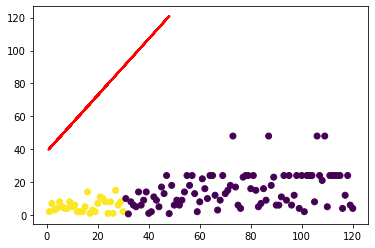

In [23]:
plt.scatter(x=hackerNewsData['Rank'], y=hackerNewsData['Hours_Posted'], c=hackerNewsData.Front_Page)
plt.plot(hackerNewsData['Hours_Posted'], hackerNewsData_Posted_ols.predict(), color='red', linewidth=2)

In [24]:
import statsmodels.formula.api as sm
import numpy as np

In [25]:
hackerNewsData_Points_ols = sm.ols(formula="Rank ~ Points", data=hackerNewsData).fit()
hackerNewsData_Points_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.01488
Date:                Thu, 08 Jul 2021   Prob (F-statistic):              0.903
Time:                        18:01:49   Log-Likelihood:                -595.67
No. Observations:                 120   AIC:                             1195.
Df Residuals:                     118   BIC:                             1201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.1760      4.150     14.499      0.000      51.957      68.395
Points         0.0023      0.019      0.122      0.903      -0.035       0.040
==============================================================================
Omnibus:                       43.929   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.194
Skew:                          -0.000   Prob(JB):                       0.0274
Kurtosis:                       1.801   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

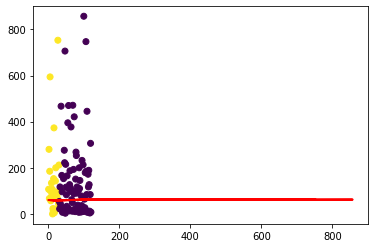

In [26]:
plt.scatter(x=hackerNewsData['Rank'], y=hackerNewsData['Points'], c=hackerNewsData.Front_Page)
plt.plot(hackerNewsData['Points'], hackerNewsData_Points_ols.predict(), color='red', linewidth=2)

In [27]:
hackerNewsData_Comments_ols = sm.ols(formula="Rank ~ Comments", data=hackerNewsData).fit()
hackerNewsData_Comments_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7146
Date:                Thu, 08 Jul 2021   Prob (F-statistic):              0.400
Time:                        18:01:49   Log-Likelihood:                -595.31
No. Observations:                 120   AIC:                             1195.
Df Residuals:                     118   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4551      3.932     15.886      0.000      54.670      70.241
Comments      -0.0282      0.033     -0.845      0.400      -0.094       0.038
==============================================================================
Omnibus:                       38.729   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.883
Skew:                          -0.001   Prob(JB):                       0.0320
Kurtosis:                       1.827   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

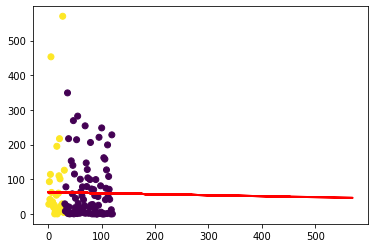

In [28]:
plt.scatter(x=hackerNewsData['Rank'], y=hackerNewsData['Comments'], c=hackerNewsData.Front_Page)
plt.plot(hackerNewsData['Comments'], hackerNewsData_Comments_ols.predict(), color='red', linewidth=2)

None of these linear regressions seem to be a good fit. At the time of running, the best R^2 value I got was 0.261 (the highest ever was about 0.45).  This indicates that the (linear) line of best fit cannot accurately describe the data

Part 3: Logistic regression

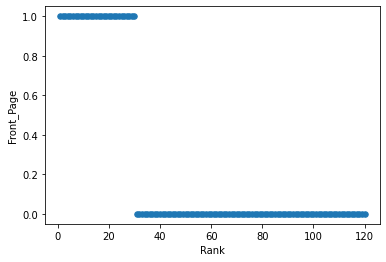

In [29]:
hackerNewsData.plot.scatter(x='Rank', y='Front_Page', s=30)

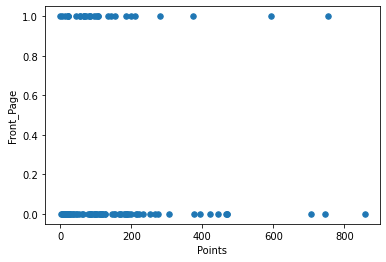

In [30]:
hackerNewsData.plot.scatter(x='Points', y='Front_Page', s=30)

In [31]:
frontPagePointsModel = sm.logit(formula='Front_Page ~ Points', data=hackerNewsData).fit()
frontPagePointsModel.summary()

Optimization terminated successfully.
         Current function value: 0.562333
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Front_Page   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:               4.590e-06
Time:                        18:01:50   Log-Likelihood:                -67.480
converged:                       True   LL-Null:                       -67.480
Covariance Type:            nonrobust   LLR p-value:                    0.9801
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1030      0.274     -4.019      0.000      -1.641      -0.565
Points      3.134e-05      0.001      0.025      0.980      -0.002       0.002
==============================================================================
"""

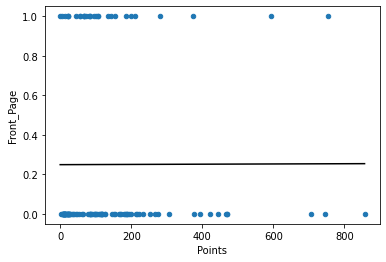

In [32]:
hackerNewsData.plot.scatter(x='Points', y='Front_Page')
logistic = lambda x: 1/(1+np.exp(-x))
x = np.linspace(hackerNewsData['Front_Page'].min(),hackerNewsData['Points'].max(),1000)
params = dict(frontPagePointsModel.params)
plt.plot(x,logistic(params['Intercept'] + params['Points']*x), color='Black')
plt.show()

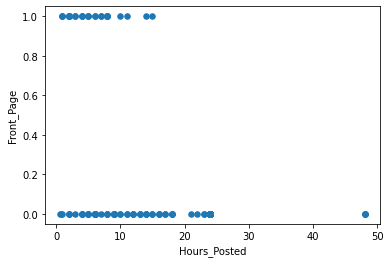

In [33]:
hackerNewsData.plot.scatter(x='Hours_Posted', y='Front_Page', s=30)

In [34]:
frontPageTimeModel = sm.logit(formula='Front_Page ~ Hours_Posted', data=hackerNewsData).fit()
frontPageTimeModel.summary()

Optimization terminated successfully.
         Current function value: 0.426791
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Front_Page   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                  0.2410
Time:                        18:01:50   Log-Likelihood:                -51.215
converged:                       True   LL-Null:                       -67.480
Covariance Type:            nonrobust   LLR p-value:                 1.173e-08
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7822      0.421      1.859      0.063      -0.043       1.607
Hours_Posted    -0.2106      0.052     -4.050      0.000      -0.312      -0.109
================================================================================
"""

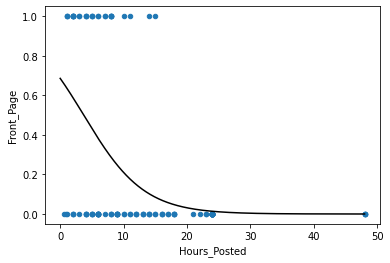

In [35]:
hackerNewsData.plot.scatter(x='Hours_Posted', y='Front_Page')
logistic = lambda x: 1/(1+np.exp(-x))
x = np.linspace(hackerNewsData['Front_Page'].min(),hackerNewsData['Hours_Posted'].max(),1000)
params = dict(frontPageTimeModel.params)
plt.plot(x,logistic(params['Intercept'] + params['Hours_Posted']*x), color='Black')
plt.show()

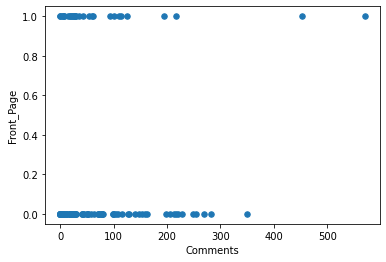

In [36]:
hackerNewsData.plot.scatter(x='Comments', y='Front_Page', s=30)

In [37]:
frontPageCommentsModel = sm.logit(formula='Front_Page ~ Comments', data=hackerNewsData).fit()
frontPageCommentsModel.summary()

Optimization terminated successfully.
         Current function value: 0.559081
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Front_Page   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                0.005786
Time:                        18:01:50   Log-Likelihood:                -67.090
converged:                       True   LL-Null:                       -67.480
Covariance Type:            nonrobust   LLR p-value:                    0.3769
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2343      0.264     -4.673      0.000      -1.752      -0.717
Comments       0.0019      0.002      0.899      0.368      -0.002       0.006
==============================================================================
"""

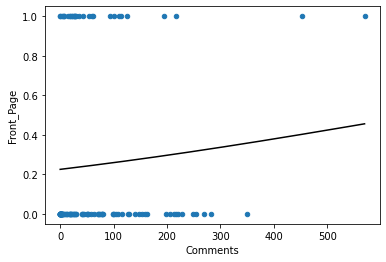

In [38]:
hackerNewsData.plot.scatter(x='Comments', y='Front_Page')
logistic = lambda x: 1/(1+np.exp(-x))
x = np.linspace(hackerNewsData['Front_Page'].min(),hackerNewsData['Comments'].max(),1000)
params = dict(frontPageCommentsModel.params)
plt.plot(x,logistic(params['Intercept'] + params['Comments']*x), color='Black')
plt.show()

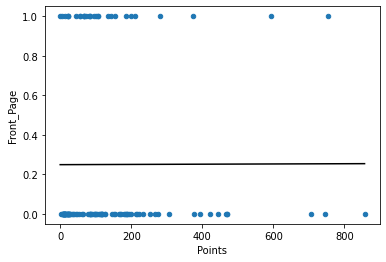

In [39]:
hackerNewsData.plot.scatter(x='Points', y='Front_Page')
logistic = lambda x: 1/(1+np.exp(-x))
x = np.linspace(hackerNewsData['Front_Page'].min(),hackerNewsData['Points'].max(),1000)
params = dict(frontPagePointsModel.params)
plt.plot(x,logistic(params['Intercept'] + params['Points']*x), color='Black')
plt.show()

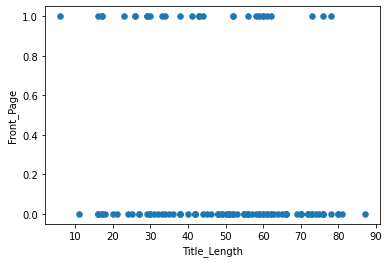

In [40]:
hackerNewsData.plot.scatter(x='Title_Length', y='Front_Page', s=30)

In [41]:
frontPageTitleModel = sm.logit(formula='Front_Page ~ Title_Length', data=hackerNewsData).fit()
frontPageTitleModel.summary()

Optimization terminated successfully.
         Current function value: 0.550104
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Front_Page   No. Observations:                  118
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                 0.02970
Time:                        18:01:51   Log-Likelihood:                -64.912
converged:                       True   LL-Null:                       -66.899
Covariance Type:            nonrobust   LLR p-value:                   0.04621
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0306      0.555     -0.055      0.956      -1.118       1.057
Title_Length    -0.0223      0.011     -1.962      0.050      -0.045   -2.42e-05
================================================================================
"""

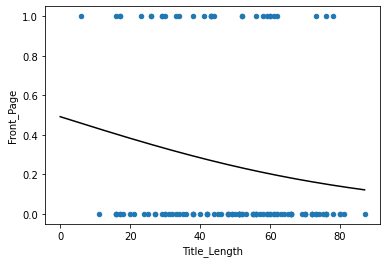

In [42]:
hackerNewsData.plot.scatter(x='Title_Length', y='Front_Page')
logistic = lambda x: 1/(1+np.exp(-x))
x = np.linspace(hackerNewsData['Front_Page'].min(),hackerNewsData['Title_Length'].max(),1000)
params = dict(frontPageTitleModel.params)
plt.plot(x,logistic(params['Intercept'] + params['Title_Length']*x), color='Black')
plt.show()

The most clear logistic relationship showed that the longer that an article was published, the less likely it is to be featured on the front page.  This tracks because the front page shouldn't be displaying old news. There is also some indication that the higher number of points would mean the article would be featured on the front page.